In [2]:
import sys

import numpy as np

import mypd
from spiketrain.sptr import SpikeTrains

from actxanalysis.data.celldata import CellData
from paths import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### __init__

In [7]:
# neuron_folder = 'ACx_data_1/ACxThelo/20171114-d003-f004'
# neuron_folder = 'ACx_data_1/ACxCalyx/20100428-001'
# neuron_folder = 'ACx_data_3/ACxCalyx/clicks_data/20200717-xxx999-002-001'
# neuron_folder = 'ACx_data_3/silence_data/ACxCalyx/20200718-xxx999-001-002'
# neuron_folder = 'ACx_data_3/ACxCalyx/20200721-xxx999-002-002'
neuron_folder = 'ACx_data_3/ACxThelo/20200708-xxx999-003-003'
# neuron_folder = 'ACx_data_2/'

cd = CellData(folder=data_folder + neuron_folder)

display(cd.df)

None

In [16]:
type_counts = cd.df['type'].value_counts()
type_counts, list(type_counts.index), list(type_counts.values)

(tone       560
 fmsweep    108
 Name: type, dtype: int64,
 ['tone', 'fmsweep'],
 [560, 108])

#### get_mask_spikes_trials

<AxesSubplot:>

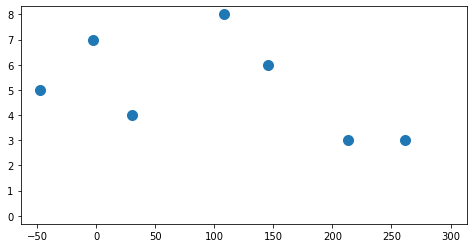

In [17]:
dic_stim = dict(type='fmsweep', speed=25, sweep_direction='up')

t0, tf = -50, 300
t = np.arange(t0, tf, cd.dt)
mask_spikes_trials = cd.get_mask_spikes_trials(dic_stim, t0=-50, tf=300)
st = SpikeTrains(t, mask_spikes_trials)
st.plot(ms=10, mew=1)

#### get_mask_spikes_stim

<AxesSubplot:>

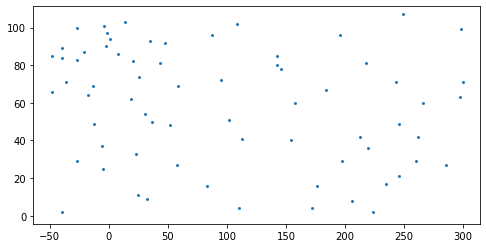

In [18]:
dic_stim = dict(type='fmsweep')

t0, tf = -50, 300
t = np.arange(t0, tf, cd.dt)
stim_cats, mask_spikes_stim = cd.get_mask_spikes_stim(dic_stim, ['speed'], t0=t0, tf=tf)
mask_spikes_stim = mask_spikes_stim.reshape(mask_spikes_stim.shape[0], -1)
mask_spikes_stim = mask_spikes_stim[:, ~np.isnan(mask_spikes_stim[0, :])]
st = SpikeTrains(t, mask_spikes_stim)
st.plot(ms=3, mew=0, marker='o')

#### get_stimdata

<AxesSubplot:>

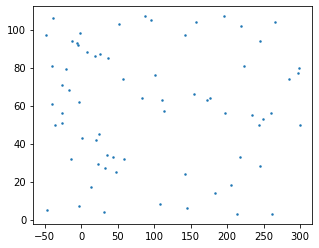

In [39]:
dic_stim = dict(type='fmsweep')

t0, tf = -50, 300
t = np.arange(t0, tf, cd.dt)
stimdata = cd.get_stimdata(dic_stim, ['speed', 'speed_abs', 'sweep_direction', 'duration'], t0=t0, tf=tf)
stimdata = stimdata.sort_values(['sweep_direction', 'speed_abs'], ascending=[False, True])

stimdata.plot_raster(ms=5, mew=0, marker='.', col='speed')

In [ ]:
dic_stim = dict(type='tone')

t0, tf = -50, 600
t = np.arange(t0, tf, cd.dt)
stimdata = cd.get_stimdata(dic_stim, ['amplitude', 'frequency', 'duration'], t0=t0, tf=tf)
# stimdata = stimdata.sort_values(['sweep_direction', 'speed_abs'], ascending=[False, True])

stimdata.plot_raster(ms=5, mew=0, marker='.', col='amplitude')

### get_mask_spikes_from_idx

In [ ]:
cd.df['end_stimulus'] = cd.df['trigger'] + cd.df['duration']
cd.df['next_trigger'] = np.append(cd.df.iloc[1:]['trigger'].values, float(cd.dt * cd.n_samples))
cd.df['after_stimulus_period'] = cd.df['next_trigger'] - cd.df['end_stimulus']

idx = list(cd.df[cd.df['after_stimulus_period'] > 1650].index)

t0 = cd.df.loc[idx, 'duration'].max() + 50
mask = cd.get_mask_spikes_from_idx(idx, t0=-300, tf=1800)

SpikeTrain(np.arange(mask.shape[0]), mask).plot()

In [ ]:
t0 = cd.df.loc[idx, 'duration'].max() + 50
# cd.df.after_stimulus_period

In [ ]:
cd.df['end_stimulus'] = cd.df['trigger'] + cd.df['duration']
cd.df['next_trigger'] = np.append(cd.df.iloc[1:]['trigger'].values, float(cd.dt * cd.n_samples))
cd.df['after_stimulus_period'] = cd.df['next_trigger'] - cd.df['end_stimulus']

t_last_spk = cd.arg_spikes[-1, 0] * cd.dt

idx = list(cd.df[(cd.df['after_stimulus_period'] > 1650) & (cd.df.trigger < t_last_spk)].index)

t0 = cd.df.loc[idx, 'duration'].max() + 50
mask = cd.get_mask_spikes_after_stimulus(idx)

SpikeTrain(np.arange(mask.shape[0]), mask).plot()

### get_mask_spikes_from_triggers

In [ ]:
tf = cd.n_samples * cd.dt
triggers = np.arange(0, tf, 1560)
mask_spikes = cd.get_mask_spikes_from_triggers(triggers, t0=0, tf=1560)